In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
all_spdrs = pd.DataFrame()
list_of_spdrs = ['XLF', 'XLU', 'XLRE', 'XLE', 'XLB', 'XLI', 'XLK', 'XTL', 'XLP', 'XLY', 'XLV']
for names in list_of_spdrs:
    data = pd.read_excel("C:\\Users\\Hp\\Downloads\\GWP1_Files\\GWP1SPDR.xlsx", sheet_name=names) 
    data.set_index('observation_date', inplace=True)
    all_spdrs = all_spdrs.join(data, how='outer')

all_spdrs.fillna(inplace=True, method='ffill')
all_spdrs = all_spdrs.resample('MS').first()
all_spdrs.head()

,XLF,XLU,XLRE,XLE,XLB,XLI,XLK,XTL,XLP,XLY,XLV
observation_date,,,,,,,,,,,
2013-12-01,17.7507,37.97,NaN,88.51,46.22,52.26,35.74,55.3300,42.98,66.83,55.440
2014-01-01,17.6532,37.39,NaN,87.25,45.85,51.53,35.39,54.9900,42.45,66.52,55.130
2014-02-01,16.6707,38.79,NaN,81.89,43.01,48.64,34.09,53.8300,39.88,61.17,54.860
2014-03-01,17.4827,40.05,NaN,87.09,46.97,51.71,35.96,56.0032,42.12,66.21,59.000
2014-04-01,18.1729,41.17,NaN,89.59,47.54,52.70,36.78,57.8757,42.99,65.62,58.855


In [13]:
start = '2014-01-01'
end = '2020-01-01'

spdrs_returns = all_spdrs.pct_change()
spdrs_returns.reset_index(inplace=True)
spdrs_returns = spdrs_returns[ (spdrs_returns['observation_date'] > start) &(spdrs_returns['observation_date'] < end)]
spdrs_returns.set_index(keys = 'observation_date', drop=True, inplace=True)
print(spdrs_returns.head())
print(spdrs_returns.tail())


                       XLF       XLU  XLRE       XLE       XLB       XLI  \
observation_date                                                           
2014-02-01       -0.055656  0.037443   NaN -0.061433 -0.061941 -0.056084   
2014-03-01        0.048708  0.032483   NaN  0.063500  0.092072  0.063117   
2014-04-01        0.039479  0.027965   NaN  0.028706  0.012135  0.019145   
2014-05-01       -0.016976  0.053923   NaN  0.043978 -0.003576  0.003795   
2014-06-01        0.015909 -0.015211   NaN  0.017748  0.040321  0.026087   

                       XLK       XTL       XLP       XLY       XLV  
observation_date                                                    
2014-02-01       -0.036734 -0.021095 -0.060542 -0.080427 -0.004898  
2014-03-01        0.054855  0.040372  0.056169  0.082393  0.075465  
2014-04-01        0.022803  0.033436  0.020655 -0.008911 -0.002458  
2014-05-01       -0.007885 -0.052625  0.028146 -0.023316 -0.010280  
2014-06-01        0.034804  0.009630  0.016516  0.028

In [14]:
# Correlation matrix
correlation_matrix = spdrs_returns.corr()
correlation_matrix

,XLF,XLU,XLRE,XLE,XLB,XLI,XLK,XTL,XLP,XLY,XLV
XLF,1.000000,0.034013,0.284378,0.642585,0.730386,0.837591,0.626110,0.686140,0.435244,0.732426,0.686133
XLU,0.034013,1.000000,0.695350,0.044341,-0.015467,0.146249,0.217932,0.143752,0.568069,0.164159,0.232023
XLRE,0.284378,0.695350,1.000000,0.305918,0.339365,0.416913,0.374923,0.404562,0.657489,0.431722,0.512760
XLE,0.642585,0.044341,0.305918,1.000000,0.740459,0.726244,0.538881,0.601109,0.290273,0.610497,0.548388
XLB,0.730386,-0.015467,0.339365,0.740459,1.000000,0.857819,0.729342,0.735596,0.417680,0.777792,0.709049
XLI,0.837591,0.146249,0.416913,0.726244,0.857819,1.000000,0.754925,0.768365,0.548653,0.818619,0.787600
XLK,0.626110,0.217932,0.374923,0.538881,0.729342,0.754925,1.000000,0.762875,0.584803,0.824044,0.669783
XTL,0.686140,0.143752,0.404562,0.601109,0.735596,0.768365,0.762875,1.000000,0.453954,0.773052,0.666906
XLP,0.435244,0.568069,0.657489,0.290273,0.417680,0.548653,0.584803,0.453954,1.000000,0.623843,0.595662
XLY,0.732426,0.164159,0.431722,0.610497,0.777792,0.818619,0.824044,0.773052,0.623843,1.000000,0.742781


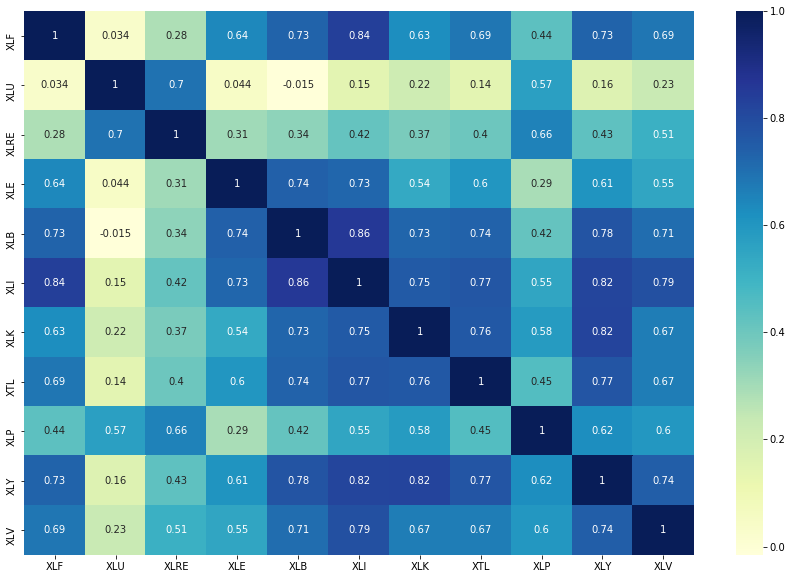

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap = 'YlGnBu', annot = True, ax = ax);

In [19]:
# Runnig kmeans for clustering with no of cluster 3
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(spdrs_returns.dropna())
kmeans.cluster_centers_

array([[ 0.01519454,  0.00343972,  0.00525297,  0.00943246,  0.01266275,
         0.01298983,  0.02376135,  0.01056888,  0.00731084,  0.01631021,
         0.01555167],
       [-0.05309151,  0.00813812, -0.01841629, -0.07682892, -0.05396963,
        -0.05463651, -0.04499766, -0.05363909, -0.01668403, -0.04393107,
        -0.04666917],
       [ 0.06782423,  0.02517993,  0.03172933,  0.05832468,  0.06478478,
         0.07594057,  0.06263065,  0.05782165,  0.02685608,  0.05105954,
         0.04650635]])

In [73]:
factor_file = "C:\\Users\\Hp\\Downloads\\GWP1_Files\\GWP1Factors.xlsx"

In [74]:
def combine_factors(factors):
    factor_data = pd.DataFrame()

    for row in factors.iterrows():
        seriecode = row[1]['SeriesCode']
        factor = pd.read_excel(factor_file,sheet_name=seriecode, skiprows=10)
        factor.set_index(keys = 'observation_date', drop=False, inplace=True)
        factor.drop(labels='observation_date', axis=1, inplace=True)

        factor_data = factor_data.join(factor, how='outer')
        factor_data.fillna(inplace=True, method='ffill')

    factor_data.fillna(inplace=True, method='ffill')
    factor_data.reset_index(inplace=True)
    factor_data = factor_data[ (factor_data['observation_date'] > start) & 
                              (factor_data['observation_date'] < end)]
    factor_data.set_index(keys = 'observation_date', drop=True, inplace=True)
    factor_data = factor_data.resample('MS').first()
    return factor_data

In [75]:
factors = pd.read_excel(factor_file, sheet_name="Weights")
overall_factors = combine_factors(factors)

In [76]:
overall_factors.head(10)

,AWHMAN,IC4WSA,ACDGNO,ISM-NewOrders,NEWORDER,PERMIT,SP500,NFCINONFINLEVERAGE,T10YFF,UMCSENT,...,W875RX1,INDPRO,CMRMTSPL,MNFCTRIRSA,UEMPMEAN,TDSP,TOTCI,DPRIME,ULCMFG,CUSR0000SASLE
observation_date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,41.6,346000.0,32797.0,51.2,68237.0,976.0,1831.98,-1.21059,2.92,81.2,...,11800.5,100.0380,1328414.0,1.30,35.1,9.953297,1583.4759,3.25,102.228,290.063
2014-02-01,41.6,329000.0,34641.0,54.5,67386.0,1039.0,1782.59,-1.19935,2.60,81.6,...,11870.9,100.7918,1339979.0,1.29,36.5,9.953297,1591.4181,3.25,102.228,290.590
2014-03-01,42.0,332250.0,35032.0,55.1,68683.0,1067.0,1859.45,-1.20113,2.60,80.0,...,11933.0,101.7782,1350652.0,1.30,35.3,9.953297,1628.4365,3.25,102.228,291.366
2014-04-01,41.9,321500.0,34319.0,55.1,66486.0,1090.0,1885.52,-1.21072,2.69,84.1,...,11965.2,101.8337,1352609.0,1.30,34.9,9.888216,1632.3333,3.25,101.485,292.062
2014-05-01,42.1,322750.0,35937.0,56.9,65819.0,1018.0,1883.68,-1.22066,2.54,81.9,...,11993.1,102.2325,1356343.0,1.31,34.4,9.888216,1655.2212,3.25,101.485,292.806
2014-06-01,42.1,311000.0,35256.0,58.9,69618.0,1010.0,1923.57,-1.22082,2.40,82.5,...,12042.7,102.5722,1355815.0,1.31,33.9,9.888216,1666.9908,3.25,101.485,293.271
2014-07-01,42.0,313500.0,37653.0,63.4,67842.0,1076.0,1973.32,-1.20712,2.48,81.8,...,12085.3,102.8479,1364444.0,1.30,32.7,9.843461,1682.1181,3.25,102.215,293.920
2014-08-01,42.0,301750.0,35743.0,66.7,68514.0,1047.0,1925.15,-1.17613,2.43,82.5,...,12150.7,102.6491,1366998.0,1.31,32.0,9.843461,1699.0342,3.25,102.215,294.350
2014-09-01,42.2,303750.0,36054.0,60.0,69207.0,1077.0,2003.37,-1.14499,2.28,84.6,...,12196.7,102.9858,1366811.0,1.32,31.9,9.843461,1712.1363,3.25,102.215,294.853


In [78]:
all_trees = []
print("All factor Regression Trees")
for key in list_of_spdrs:
    dat = spdrs_returns[key][~spdrs_returns[key].isna()]
    y = dat.to_numpy()
    X = overall_factors.loc[dat.index].to_numpy()
    reg = DecisionTreeRegressor().fit(X, y)
    score = reg.score(X, y)
    adjusted_score = 1 - (1 - score) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    all_trees.append([key, adjusted_score])
    print("Decision Tree Overall ", key, adjusted_score)
    
all_trees = pd.DataFrame(all_trees, columns = ["key", "all_trees"])

All factor Regression Trees


AttributeError: 'Series' object has no attribute 'to_numpy'

In [80]:


import pandas
print(pandas.__version__)

0.23.0
